**NETFLIX Dataset Visualization**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [5]:
df=pd.read_csv('/content/drive/MyDrive/vois /Netflix Dataset.csv')

In [6]:
#cleaning the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [10]:
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
df.isnull().sum()

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,10
Rating,7
Duration,0
Type,0


In [13]:
# Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

In [15]:
# Extract Main Genre (first genre listed in 'Type')
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7772 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7772 non-null   object
 1   Category      7772 non-null   object
 2   Title         7772 non-null   object
 3   Director      7772 non-null   object
 4   Cast          7772 non-null   object
 5   Country       7772 non-null   object
 6   Release_Date  7772 non-null   object
 7   Rating        7772 non-null   object
 8   Duration      7772 non-null   object
 9   Type          7772 non-null   object
 10  Description   7772 non-null   object
dtypes: object(11)
memory usage: 728.6+ KB


In [12]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
# Extract Year
df['Year'] = df['Release_Date'].dt.year

In [17]:
# Count of Movies vs TV Shows
print("\nCategory Distribution:\n", df['Category'].value_counts())

# Top Countries
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))

# Dataset span (years)
print("\nDataset covers years from", df['Year'].min(), "to", df['Year'].max())



Category Distribution:
 Category
Movie      5379
TV Show    2312
Name: count, dtype: int64

Top 5 Countries:
 Country
United States     2516
India              922
Others             503
United Kingdom     381
Japan              222
Name: count, dtype: int64

Dataset covers years from 2008.0 to 2021.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7691 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7691 non-null   object        
 1   Category      7691 non-null   object        
 2   Title         7691 non-null   object        
 3   Director      7691 non-null   object        
 4   Cast          7691 non-null   object        
 5   Country       7691 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7691 non-null   object        
 8   Duration      7691 non-null   object        
 9   Type          7691 non-null   object        
 10  Description   7691 non-null   object        
 11  Year          7691 non-null   float64       
 12  Main_Genre    7691 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 841.2+ KB


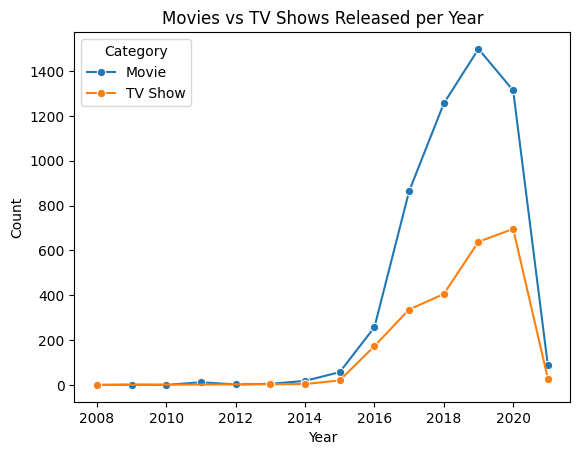

In [19]:
# 1. Line Chart – Movies vs. TV Shows released per year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-76000803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


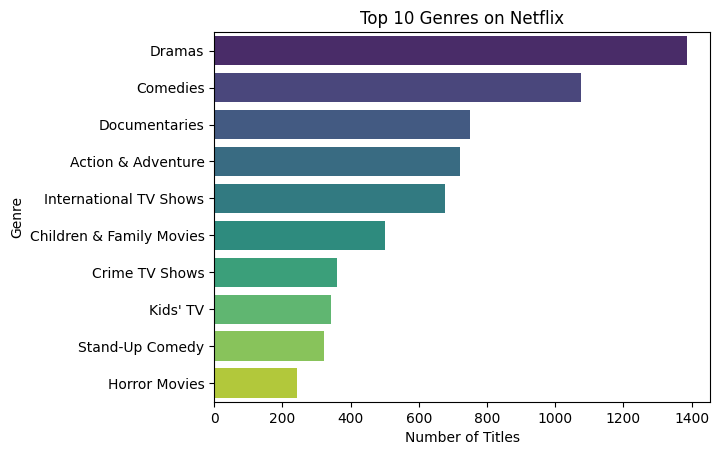

In [20]:
# 2. Bar Chart – Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


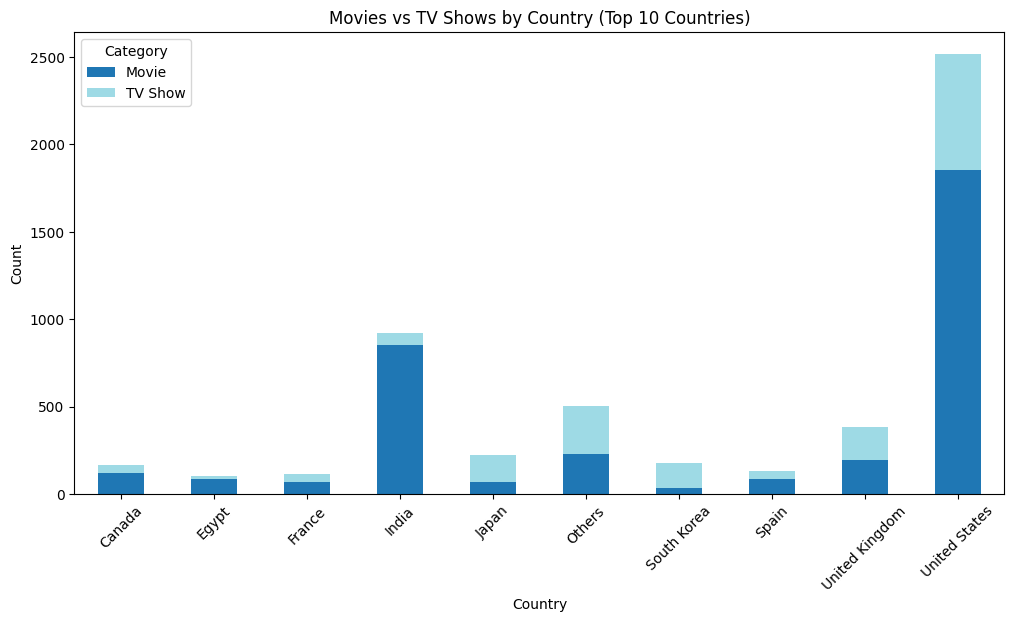

In [21]:
# 3. Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [22]:
# 4. Choropleth Map – Country-wise Content
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(country_counts, locations="Country", locationmode="country names",
                    color="Count", hover_name="Country",
                    color_continuous_scale="viridis", title="Netflix Content by Country")
fig.show()


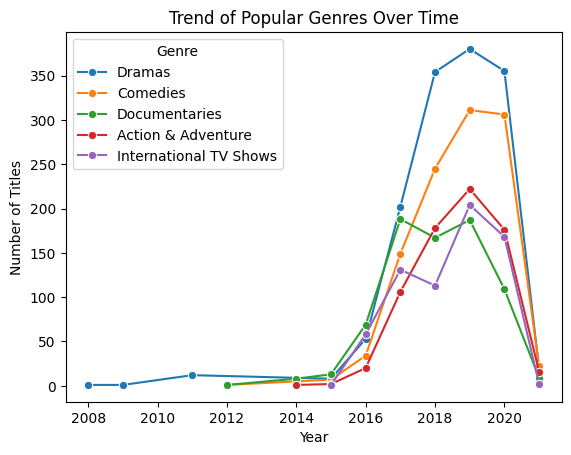

In [24]:
# 5. Trend Line – Growth of Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')

sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o")
plt.title("Trend of Popular Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()
